<div style="width: 100%; padding: 20px;">
    <center>
        <img src="Images/nus_logo.png" width="200" style="margin-bottom: 30px;">
    </center>
    <div style="font-size: 45px; color:#002147; font-weight: bold; text-align: center; margin-bottom: 50px;">
        EE2211 Introduction to Machine Learning
    </div>
    <div style="font-size: 32px; color:#FF6F00; text-align: center; margin-bottom: 30px; font-weight: normal;">
        Optional Python Session (Week 11)
    </div>
    <hr style="border: none; border-top: 2px solid #002147; width: 80%; margin: 0 auto 30px auto;">
    <p style="text-align:right; font-size: 18px; font-weight: normal; margin-right: 20px;">
        <strong>Mr. ZHU, Zikun</strong><br>
        Department of Electrical and Computer Engineering
    </p>
</div>

# Decision Trees and Random Forests

## Decision Trees
A **decision tree** is a machine learning model that can be used for both classification and regression applications. It works by recursively splitting the dataset into smaller subsets based on feature values, forming a tree-like structure. Each decision node represents a test on a feature (e.g., whether a house size is greater than a certain threshold), each branch represents the outcome of the test, and each leaf node represents a final prediction.

Using decision trees introduces nonlinearity into models, similar to how polynomial regression captures nonlinear relationships.

---

### How Decision Trees Work

#### Splitting the Data
- The model considers all possible splits across all features to partition the data.
- The "best split" minimizes a certain criterion:
    - Regression Trees: Minimize the Mean Squared Error (MSE).
    - Classification Trees: Minimize impurity measures like Gini impurity or entropy or misclassification rate to maximize the homogeneity of the target classes.

#### Stopping Criteria
To prevent overfitting—where the model performs well on training data but poorly on new data—we set limits on the tree's growth:
- Maximum Depth (`max_depth`): Limits the number of levels in the tree.
- Minimum Improvement: Stops splitting if further splits do not significantly reduce impurity or error.

---

## Random Forests
A **Random Forest** is an ensemble of decision trees where each tree is trained on a bootstrapped* dataset and considers a random subset of features when splitting nodes.

*What Is Bootstrapping?

Sampling with Replacement:
- When we draw a sample from the dataset, we put it back before the next draw. This means the same sample can be selected multiple times.
Bootstrapped Dataset:
- A new dataset created by randomly selecting samples from the original dataset with replacement. It typically has the same size as the original dataset.


Prediction Aggregation:
- Regression: Predictions are averaged across all trees.
- Classification: Predictions are made based on majority voting.

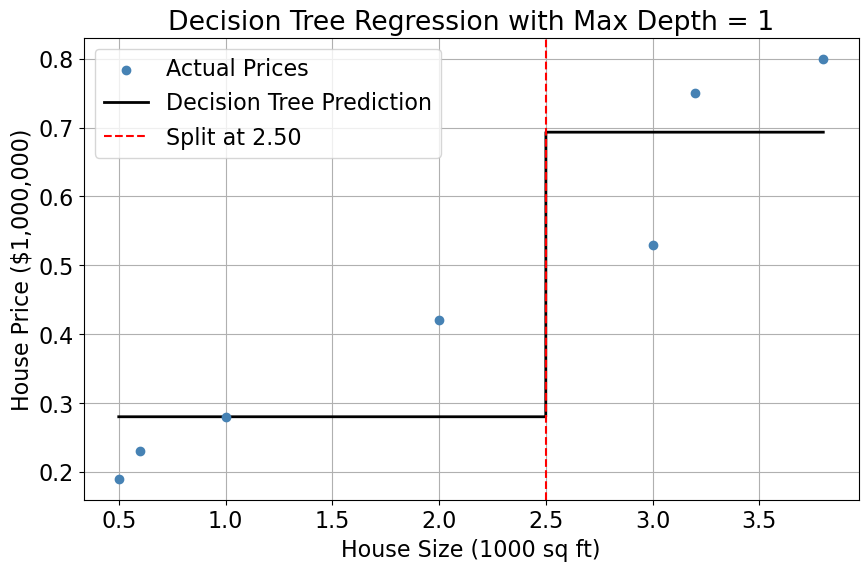

Decision Tree Details:
Feature used for split: 'House Size' (index 0)
Threshold value for split: 2.50

Mean price in left region (House Size ≤ 2.50): 0.28
Mean price in right region (House Size > 2.50): 0.69


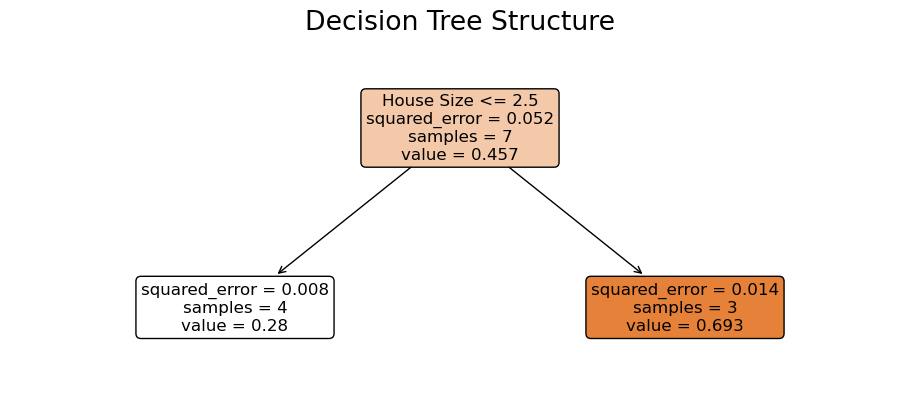


Predicted price for house size 2.71: 0.69


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Data Preparation
# ----------------
# Define the dataset: House sizes (in 1000 square feet) and corresponding prices (in $1,000,000)
house_sizes = np.array([0.5, 0.6, 1.0, 2.0, 3.0, 3.2, 3.8])
prices = np.array([0.19, 0.23, 0.28, 0.42, 0.53, 0.75, 0.80])

# Reshape the data to fit scikit-learn's expected input format
X = house_sizes.reshape(-1, 1)  # Feature matrix
y = prices                      # Target vector

# Model Training
# --------------
# Create a decision tree regressor with maximum depth of 1 (for simplicity)
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=1, random_state=0)

# Fit the model to the data
regressor.fit(X, y)

# Retrieve the split threshold from the trained tree
threshold = regressor.tree_.threshold[0]

# Prediction
# ----------
# Create a range of house sizes for plotting the prediction curve
house_size_range = np.linspace(house_sizes.min(), house_sizes.max(), 10000).reshape(-1, 1)

# Use the trained model to predict prices for the range of house sizes
predicted_prices = regressor.predict(house_size_range)

# Visualization
# -------------
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.scatter(house_sizes, prices, color='steelblue', label='Actual Prices', zorder=5)

# Plot the decision tree regression predictions
plt.plot(house_size_range, predicted_prices, color='black', lw=2, label='Decision Tree Prediction')

# Plot the split threshold as a vertical dashed line
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Split at {threshold:.2f}')

# Add labels, title, and legend to the plot
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('House Price ($1,000,000)')
plt.title('Decision Tree Regression with Max Depth = 1')
plt.legend()
plt.grid(True)
plt.show()

# Model Interpretation
# --------------------
# Print details about the decision tree
print("Decision Tree Details:")
print(f"Feature used for split: 'House Size' (index {regressor.tree_.feature[0]})")
print(f"Threshold value for split: {threshold:.2f}")

# Calculate the mean prices in each region defined by the split
left_region_mean = y[X.flatten() <= threshold].mean()
right_region_mean = y[X.flatten() > threshold].mean()

print(f"\nMean price in left region (House Size ≤ {threshold:.2f}): {left_region_mean:.2f}")
print(f"Mean price in right region (House Size > {threshold:.2f}): {right_region_mean:.2f}")

# Visualization of the Decision Tree Structure
# --------------------------------------------
# Visualize the decision tree structure
plt.figure(figsize=(10, 6))
plot_tree(
    regressor,
    feature_names=['House Size'],
    filled=True,
    rounded=True,
    impurity=True,
    fontsize=12
)
plt.title('Decision Tree Structure')

# Adjust the plot margins to center the tree within the figure
# Note: Even though we have a single plot, plt.subplots_adjust() adjusts the margins around the plot.
# This is because Matplotlib treats even a single plot as a subplot in its layout.

# The plt.subplots_adjust() function modifies the spacing of the subplot(s) within the figure.
# It adjusts the padding between and around the subplots.
# Parameters:
# - left, right: The left and right margins as fractions of the figure width.
# - top, bottom: The top and bottom margins as fractions of the figure height.
# By tweaking these parameters, we can center the plot and ensure all elements are visible.

plt.subplots_adjust(left=0.05, right=0.95, top=0.8, bottom=0.2)

plt.show()

# Predicting on New Data
# ----------------------
# Predict the price for a new house size that was not in the training data
new_house_size = np.array([[2.71]])  # New house size (1000 sq ft)
predicted_price_new = regressor.predict(new_house_size)

print(f"\nPredicted price for house size {new_house_size[0][0]}: {predicted_price_new[0]:.2f}")

# Explanation:
# The model predicts the price based on the mean price in the region determined by the split.
# Since 2.71 is greater than the threshold, it falls into the right node of the tree.

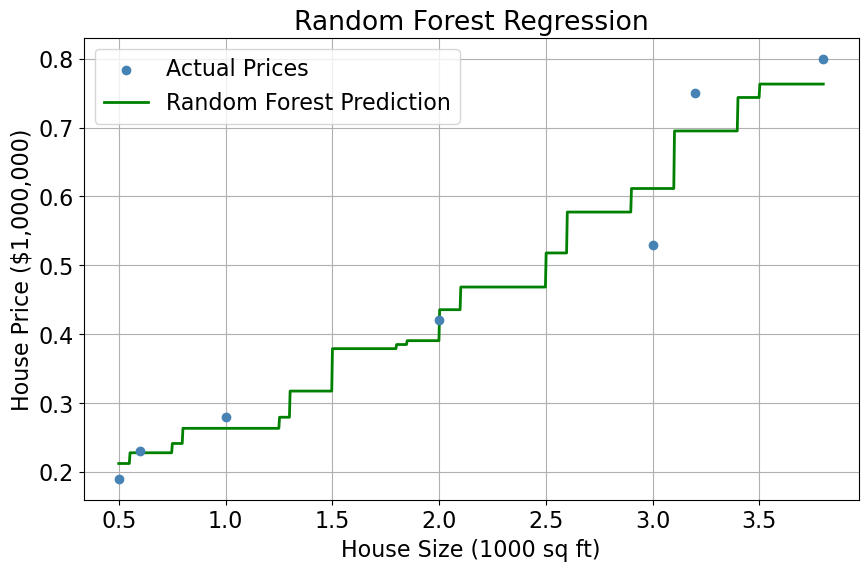

Predicted price for house size 2.71: 0.58

Tree 1 Structure:
Depth of tree: 3
|--- House Size <= 2.50
|   |--- House Size <= 1.50
|   |   |--- House Size <= 0.75
|   |   |   |--- value: [0.19]
|   |   |--- House Size >  0.75
|   |   |   |--- value: [0.28]
|   |--- House Size >  1.50
|   |   |--- value: [0.42]
|--- House Size >  2.50
|   |--- House Size <= 3.40
|   |   |--- value: [0.53]
|   |--- House Size >  3.40
|   |   |--- value: [0.80]


Tree 2 Structure:
Depth of tree: 3
|--- House Size <= 1.30
|   |--- House Size <= 0.55
|   |   |--- value: [0.19]
|   |--- House Size >  0.55
|   |   |--- value: [0.23]
|--- House Size >  1.30
|   |--- House Size <= 3.10
|   |   |--- House Size <= 2.50
|   |   |   |--- value: [0.42]
|   |   |--- House Size >  2.50
|   |   |   |--- value: [0.53]
|   |--- House Size >  3.10
|   |   |--- value: [0.75]


Tree 3 Structure:
Depth of tree: 3
|--- House Size <= 3.10
|   |--- House Size <= 1.50
|   |   |--- value: [0.28]
|   |--- House Size >  1.50
|   |  

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor

# Data Preparation
# ----------------
# Define the dataset: House sizes (in 1000 square feet) and corresponding prices (in $1,000,000)
house_sizes = np.array([0.5, 0.6, 1.0, 2.0, 3.0, 3.2, 3.8])
prices = np.array([0.19, 0.23, 0.28, 0.42, 0.53, 0.75, 0.80])

# Reshape the data to fit scikit-learn's expected input format
X = house_sizes.reshape(-1, 1)  # Feature matrix
y = prices                      # Target vector

# Model Training
# --------------
# Create a Random Forest regressor
# n_estimators: Number of trees in the forest
# random_state: Seed for reproducibility
# The Random Forest uses bootstrapping (sampling with replacement) by default
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model to the data
regressor_rf.fit(X, y)

# Prediction
# ----------
# Create a range of house sizes for plotting the prediction curve
house_size_range = np.linspace(house_sizes.min(), house_sizes.max(), 1000).reshape(-1, 1)

# Use the trained model to predict prices for the range of house sizes
predicted_prices_rf = regressor_rf.predict(house_size_range)

# Visualization
# -------------
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.scatter(house_sizes, prices, color='steelblue', label='Actual Prices', zorder=5)

# Plot the Random Forest regression predictions
plt.plot(house_size_range, predicted_prices_rf, color='green', lw=2, label='Random Forest Prediction')

# Add labels, title, and legend to the plot
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('House Price ($1,000,000)')
plt.title('Random Forest Regression')
plt.legend()
plt.grid(True)
plt.show()

# Model Interpretation
# --------------------
# Predict the price for a new house size that was not in the training data
new_house_size = np.array([[2.71]])  # New house size (1000 sq ft)
predicted_price_new_rf = regressor_rf.predict(new_house_size)

print(f"Predicted price for house size {new_house_size[0][0]}: {predicted_price_new_rf[0]:.2f}")

# Explanation:
# The Random Forest predicts the price by averaging the predictions from multiple decision trees.
# This ensemble approach reduces the instability and variance associated with a single decision tree.

# Print the structures and depths of the first 10 trees
for i in range(10):
    tree = regressor_rf.estimators_[i]
    depth = tree.get_depth()
    print(f"\nTree {i + 1} Structure:")
    print(f"Depth of tree: {depth}")
    
    # Generate a text representation of the decision tree
    tree_text = export_text(tree, feature_names=['House Size'])
    print(tree_text)

# THE END

Feedback link: https://forms.gle/HdHMeF6Kkf9vLyia9.

Contact me if you have any questions!